### Data Analysis without QChat-10-Score

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Toddler_Autism_dataset July 2018_ogfile - Toddler Autism dataset July 2018.csv to Toddler_Autism_dataset July 2018_ogfile - Toddler Autism dataset July 2018.csv


### Import Data

In [ ]:
df = pd.read_csv("Toddler_Autism_dataset July 2018_ogfile - Toddler Autism dataset July 2018.csv")
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ClassASD_Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


### Understand the data

In [ ]:
df.shape

(1054, 19)

The data was collected for over 1054 patients and 18 features were used.

### Display Columns

In [ ]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ClassASD_Traits'],
      dtype='object')

### Removing unnecessary parameters

In [ ]:
df.drop(['Case_No', 'Who_completed_the_test', 'Qchat-10-Score'], axis = 1, inplace = True)
df.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,ClassASD_Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,Yes


### Understanding type of data and converting it into a suitable format

In [ ]:
df.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Sex                    object
Ethnicity              object
Jaundice               object
Family_mem_with_ASD    object
ClassASD_Traits        object
dtype: object

Machine Learning algorithms usually rely on mathematical operations which require their inputs to be of numeric type. So, we need to convert the 'object' type data into 'int' type.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### Map the assigned values to the labels

In [ ]:
data = pd.DataFrame(df, columns = ['Ethnicity', 'Family_mem_with_ASD', 'ClassASD_Traits', 'Sex', 'Jaundice'] )
data.head(5)

,Ethnicity,Family_mem_with_ASD,ClassASD_Traits,Sex,Jaundice
0,middle eastern,no,No,f,yes
1,White European,no,Yes,m,yes
2,middle eastern,no,Yes,m,yes
3,Hispanic,no,Yes,m,no
4,White European,yes,Yes,f,no


In [ ]:
data['Family_mem_with_ASD_encoded'] = le.fit_transform(data['Family_mem_with_ASD'])
data[['Family_mem_with_ASD', 'Family_mem_with_ASD_encoded']].value_counts().index.values

array([('no', 0), ('yes', 1)], dtype=object)

In [ ]:
data['Ethnicity_encoded'] = le.fit_transform(data['Ethnicity'])
data[['Ethnicity', 'Ethnicity_encoded']].value_counts().index.values

array([('White European', 5), ('asian', 6), ('middle eastern', 8),
       ('south asian', 10), ('black', 7), ('Hispanic', 0), ('Others', 3),
       ('Latino', 1), ('Pacifica', 4), ('mixed', 9), ('Native Indian', 2)],
      dtype=object)

In [ ]:
data['ClassASD_Traits_encoded'] = le.fit_transform(data['ClassASD_Traits'])
data[['ClassASD_Traits', 'ClassASD_Traits_encoded']].value_counts().index.values

array([('Yes', 1), ('No', 0)], dtype=object)

In [ ]:
data['Sex_encoded'] = le.fit_transform(data['Sex'])
data[['Sex', 'Sex_encoded']].value_counts().index.values

array([('m', 1), ('f', 0)], dtype=object)

In [ ]:
data['Jaundice_encoded'] = le.fit_transform(data['Jaundice'])
data[['Jaundice', 'Jaundice_encoded']].value_counts().index.values

array([('no', 0), ('yes', 1)], dtype=object)

In [ ]:
columns = ['Ethnicity', 'Family_mem_with_ASD', 'ClassASD_Traits', 'Sex', 'Jaundice']
for col in columns:
    df[col] = le.fit_transform(df[col])

df.dtypes

A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
Age_Mons               int64
Sex                    int64
Ethnicity              int64
Jaundice               int64
Family_mem_with_ASD    int64
ClassASD_Traits        int64
dtype: object

### Checking for null values

In [ ]:
df.isnull().sum()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Sex                    0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
ClassASD_Traits        0
dtype: int64

No null values.

### Setting input and target variables

We input all the values of the columns from A0 to Family_mem_with_ASD and our target variable is ClassAsd_Traits

In [ ]:
x = df.drop('ClassASD_Traits', axis='columns')   #inputs = x
x.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
0,0,0,0,0,0,0,1,1,0,1,28,0,8,1,0
1,1,1,0,0,0,1,1,0,0,0,36,1,5,1,0
2,1,0,0,0,0,0,1,1,0,1,36,1,8,1,0
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0,0
4,1,1,0,1,1,1,1,1,1,1,20,0,5,0,1


In [ ]:
y = df['ClassASD_Traits']      #target = y
y.head(5)

0    0
1    1
2    1
3    1
4    1
Name: ClassASD_Traits, dtype: int64

### Heat Map

In [ ]:
import seaborn as sns

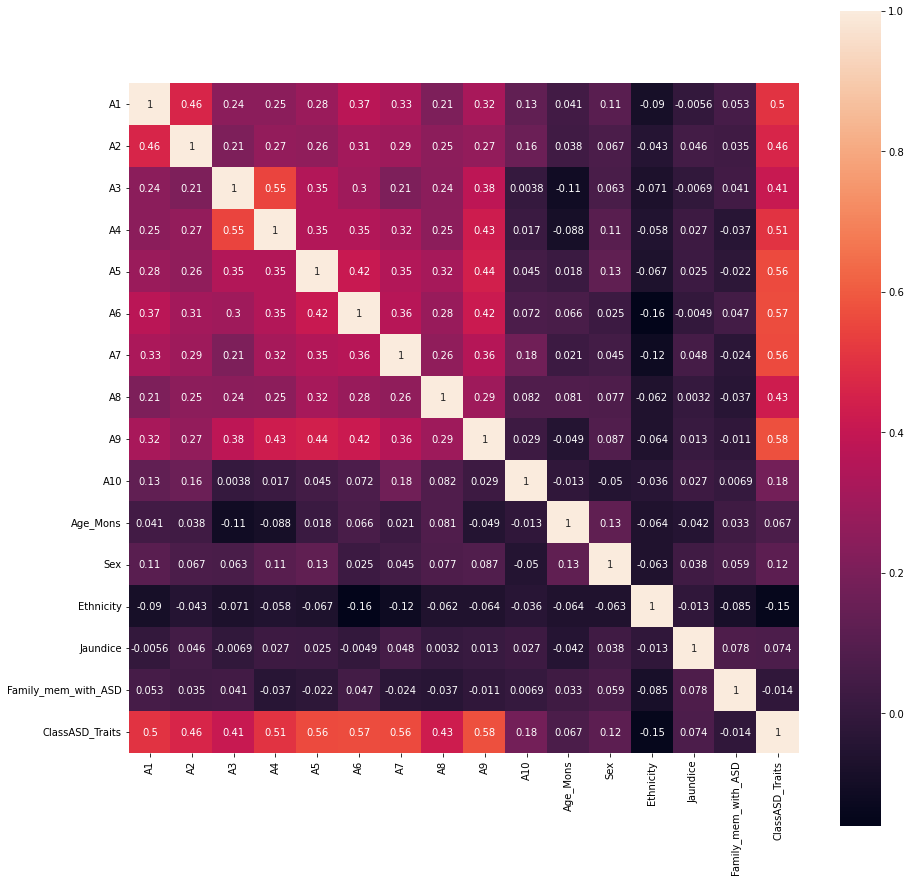

In [ ]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7, stratify=y) #using stratify we make distribution of classes same in both training and testing set
print('Processed...')

Processed...


### Decision Tree Classifier

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [ ]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 86.7298578199052


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 37,  28],
       [  0, 146]])

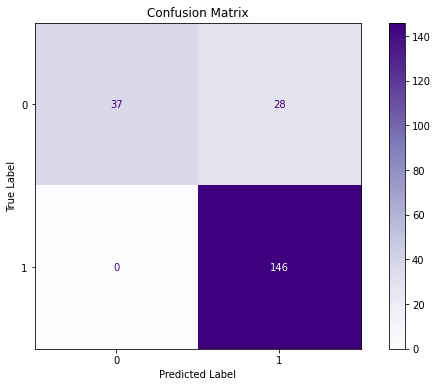

In [ ]:
matrix = plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Purples)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73        65
           1       0.84      1.00      0.91       146

    accuracy                           0.87       211
   macro avg       0.92      0.78      0.82       211
weighted avg       0.89      0.87      0.85       211



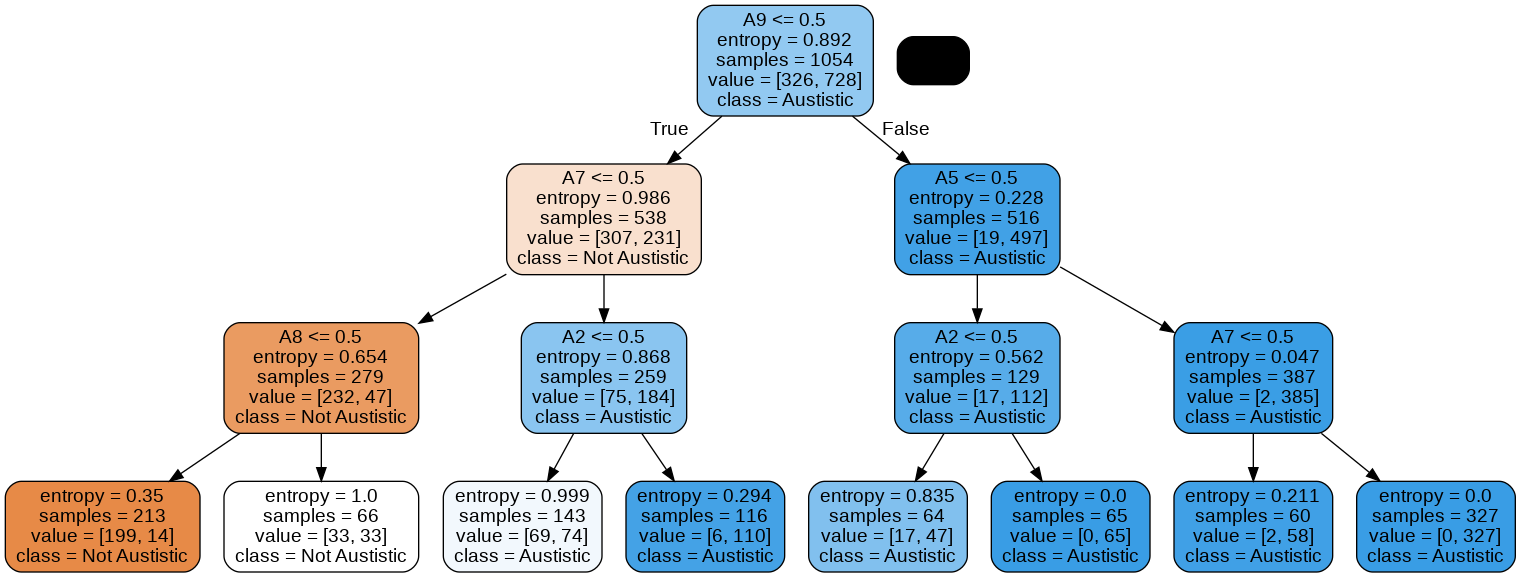

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
clf = clf.fit(x,y)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                feature_names = x.columns , class_names=['Not Austistic','Austistic'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('entropy.png')
Image(graph.create_png())

### K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import math
math.sqrt(len(y_test))

14.52583904633395

In [ ]:
#Train K Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=13, p=2, metric = 'euclidean')
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 93.8388625592417


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 56,   9],
       [  4, 142]])

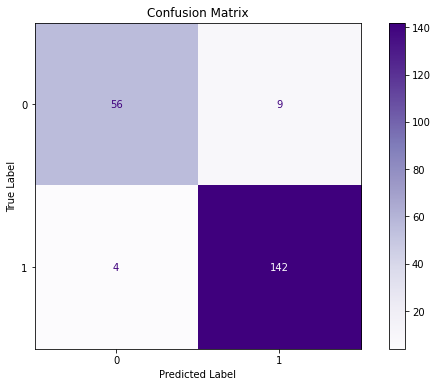

In [ ]:
matrix = plot_confusion_matrix(knn, x_test, y_test, cmap=plt.cm.Purples)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90        65
           1       0.94      0.97      0.96       146

    accuracy                           0.94       211
   macro avg       0.94      0.92      0.93       211
weighted avg       0.94      0.94      0.94       211



### Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Train Logistic Regression Classifier
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = log_reg.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 100.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 65,   0],
       [  0, 146]])

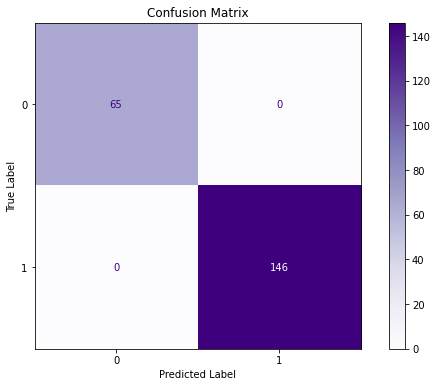

In [ ]:
matrix = plot_confusion_matrix(log_reg, x_test, y_test, cmap=plt.cm.Purples)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       146

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



**Predicting results on Real Time Data**

In [ ]:
questions1 = ['Does your child look at you when you call his/her name:\n',
             '\nHow easy is it for you to get eye-contact with your child:\n',
             '\nDoes your child point to indicate that he/she wants something:\n',
             '\nDoes your child point to share interest with you:\n',
             '\nDoes your child pretend:\n',
             '\nDoes your child follow where you are looking:\n',
             '\nIf you or someone in your family is visibly upset, does your child show signs of wanting to comfort them:\n'
            ]

questions2 = [ '\nDoes your child stare at nothing with no apparent purpose:\n']


In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [ ]:
arr = []

print('\033[1m' + 'Answer the following Questions as Always, Usually, Sometimes, Rarely or Never \n'+ '\033[0m')
for quest in questions1:
  a= input(quest)
  if (a=='Always'):
    arr.append(0)
  elif(a=='Usually'):
    arr.append(0)
  elif(a=='Sometimes'):
    arr.append(1)
  elif(a=='Rarely'):
    arr.append(1)
  else:
    arr.append(1)

print('\033[1m' + '\nAnswer the following Questions as Very Typical, Quite Typical, Slightly Unusual, Very Unusual or Child does not speak \n'+ '\033[0m')
a= input('Would you describe your child first words as:\n')
if (a=='Very Typical'):
  arr.append(0)
elif(a=='Quite Typical'):
  arr.append(0)
elif(a=='Slightly Unusual'):
  arr.append(1)
elif(a=='Very Unusual'):
  arr.append(1)
else:
  arr.append(1)

print('\033[1m' + '\nAnswer the following Questions as Always, Usually, Sometimes, Rarely or Never\n'+ '\033[0m')
a= input('Does your child use simple gestures:\n')
if (a=='Always'):
  arr.append(0)
elif(a=='Usually'):
  arr.append(0)
elif(a=='Sometimes'):
  arr.append(1)
elif(a=='Rarely'):
  arr.append(1)
else:
  arr.append(1)


for quest in questions2:
  a= input(quest)
  if (a=='Always'):
    arr.append(1)
  elif(a=='Usually'):
    arr.append(1)
  elif(a=='Sometimes'):
    arr.append(0)
  elif(a=='Rarely'):
    arr.append(0)
  else:
    arr.append(0)

arr.append(int(input('\nEnter child age in months:\n')))

print('\033[1m' + '\nEnter m-male f-female\n'+ '\033[0m')
a= input('Enter Child sex:\n')
if (a=='m'):
  arr.append(1)
else:
  arr.append(0)

print('\033[1m' + '\nSelect from Hispanic, Latino, Pacifica, White European, Asian, Black, Middle Eastern, Mixed, South Asian, Others\n'+ '\033[0m')
a= input('Enter child Ethnicity:\n')
if (a=='Hispanic'):
  arr.append(0)
elif(a == 'Latino'):
  arr.append(1)
elif(a == 'Others'):
  arr.append(3)
elif(a == 'Pacifica'):
  arr.append(4)
elif(a == 'White European'):
  arr.append(5)
elif(a == 'asian'):
  arr.append(6)
elif(a == 'black'):
  arr.append(7)
elif(a == 'middle eastern'):
  arr.append(8)
elif(a == 'mixed'):
  arr.append(9)
else:
  arr.append(10)

print('\033[1m' + '\nEnter yes or no\n'+ '\033[0m')
a= input('Does the child has an history of jaundice:\n')
if (a=='yes' or 'Yes'):
  arr.append(1)
else:
  arr.append(0)

a= input('\nDoes the child family has an ASD history:\n')
if (a=='yes'or 'Yes'):
  arr.append(1)
else:
  arr.append(0)

arr

Answer the following Questions as Always, Usually, Sometimes, Rarely or Never 

Does your child look at you when you call his/her name:
Always 

How easy is it for you to get eye-contact with your child:
Sometimes

Does your child point to indicate that he/she wants something:
Rarely

Does your child point to share interest with you:
Usually

Does your child pretend:
Never

Does your child follow where you are looking:
Always

If you or someone in your family is visibly upset, does your child show signs of wanting to comfort them:
Always

Answer the following Questions as Very Typical, Quite Typical, Slightly Unusual, Very Unusual or Child does not speak 

Would you describe your child first words as:
Quite Typical

Answer the following Questions as Always, Usually, Sometimes, Rarely or Never

Does your child use simple gestures:
Usually

Does your child stare at nothing with no apparent purpose:
Always

Enter child age in months:
18

Enter m-male f-female

Enter Child sex:
f

Select f

[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 18, 0, 5, 1, 1]

### Decision Tree Prediction

In [ ]:
a = clf.predict([arr])
if(a == 1):
  print('Child is autistic')
else:
  print('Child is not autistic')

Child is not autistic


### KNN Prediction

In [ ]:
a = knn.predict([arr])
if(a == 1):
  print('Child is autistic')
else:
  print('Child is not autistic')


Child is autistic


### Logistic Regression Prediction

In [ ]:
a = log_reg.predict([arr])
if(a == 1):
  print('Child is autistic')
else:
  print('Child is not autistic')

Child is autistic
